In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20


In [2]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('강남구전세데이터_찐마지막.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AD_Code         87361 non-null  int64  
 1   Admin_District  87361 non-null  object 
 2   Area            87361 non-null  float64
 3   YearBuilt       87361 non-null  int64  
 4   Type            87361 non-null  object 
 5   Floor           87361 non-null  float64
 6   Address         87361 non-null  object 
 7   Cont_Date       87361 non-null  object 
 8   Age             87361 non-null  int64  
 9   Latitude        87361 non-null  float64
 10  Longitude       87361 non-null  float64
 11  Star_Cnt        87361 non-null  int64  
 12  Michelin_Cnt    87361 non-null  int64  
 13  Mc_cnt          87361 non-null  int64  
 14  Bigstore_cnt    87361 non-null  int64  
 15  InterestRate    87361 non-null  float64
 16  Market_cnt      87361 non-null  int64  
 17  Subway_cnt      87361 non-null 

In [5]:
print(df.describe())
print(df.describe(include='object'))

            AD_Code          Area     YearBuilt         Floor           Age  \
count  87361.000000  87361.000000  87361.000000  87361.000000  87361.000000   
mean       5.422694     67.776567   2000.491901      6.859915     22.508099   
std        4.148519     37.183271     12.485836      5.758265     12.485836   
min        0.000000     11.390000   1972.000000     -1.000000      0.000000   
25%        2.000000     40.560000   1992.000000      3.000000     10.000000   
50%        4.000000     59.920000   2002.000000      5.000000     21.000000   
75%        9.000000     84.930000   2013.000000     10.000000     31.000000   
max       13.000000    301.470000   2023.000000     67.000000     51.000000   

           Latitude     Longitude      Star_Cnt  Michelin_Cnt        Mc_cnt  \
count  87361.000000  87361.000000  87361.000000  87361.000000  87361.000000   
mean      37.498124    127.057102      2.651034      1.253111      0.343162   
std        0.015544      0.022320      2.424018    

In [6]:
# (선택) 결측치 확인
print(df.isnull().sum())

# 결측치 처리 (예시: 평균값으로 대체)
df.fillna(df.mean(), inplace=True)

AD_Code           0
Admin_District    0
Area              0
YearBuilt         0
Type              0
Floor             0
Address           0
Cont_Date         0
Age               0
Latitude          0
Longitude         0
Star_Cnt          0
Michelin_Cnt      0
Mc_cnt            0
Bigstore_cnt      0
InterestRate      0
Market_cnt        0
Subway_cnt        0
Kinder_cnt        0
y                 0
dtype: int64


In [7]:
df

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
0,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
1,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,127.052725,0,0,0,0,4.82,0,0,2,14333
2,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17115
3,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17640
4,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,2,대치동,66.64,2004,오피스텔,8.0,서울특별시 강남구 역삼로 432,2019-07-22,19,37.501439,127.054330,3,1,1,1,2.64,0,0,1,45000
87357,13,청담동,43.68,2005,오피스텔,5.0,서울특별시 강남구 압구정로 461,2019-06-21,18,37.525283,127.047239,3,17,0,2,2.74,0,0,1,38000
87358,13,청담동,31.57,2014,오피스텔,5.0,서울특별시 강남구 도산대로 406,2019-07-20,9,37.522821,127.039963,3,31,1,2,2.64,0,0,0,23500
87359,0,개포동,29.51,2020,오피스텔,6.0,서울특별시 강남구 논현로20길 12,2020-09-08,3,37.478097,127.045854,1,0,0,0,2.44,0,0,1,3000


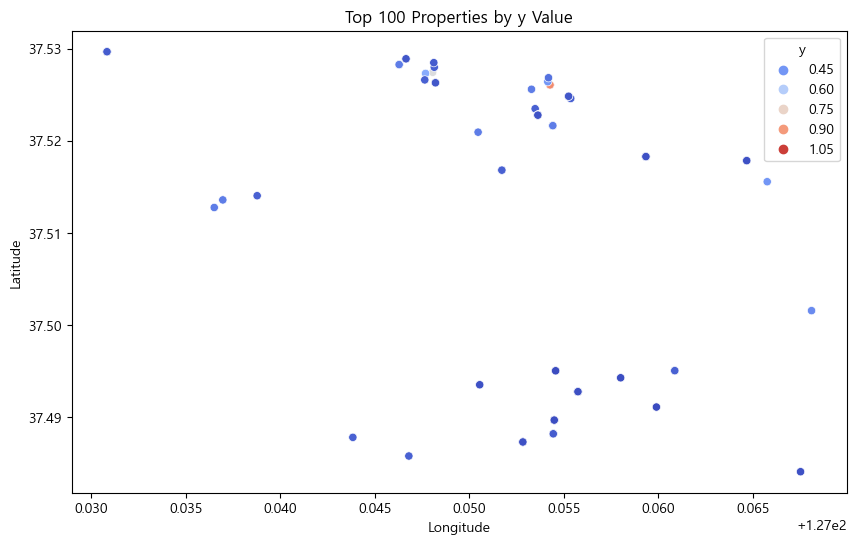

In [8]:
# 'y' 값이 가장 큰 상위 100개의 데이터를 선택
top_100 = df.nlargest(100, 'y')

# 상위 100개 데이터의 시각화 예시
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_100, x='Longitude', y='Latitude', hue='y', palette='coolwarm')
plt.title('Top 100 Properties by y Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='y')
plt.show()

In [9]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [10]:
import folium

# 상위 100개 데이터 중심 좌표 계산
center_lat = top_100['Latitude'].mean()
center_lon = top_100['Longitude'].mean()

# Folium 지도 객체 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 상위 100개 데이터에 대한 마커 추가
for idx, row in top_100.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"y: {row['y']}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# 지도를 HTML 파일로 저장
m.save('top_100_map.html')

In [11]:
import folium

# 상위 100개 데이터 중심 좌표 계산
center_lat = top_100['Latitude'].mean()
center_lon = top_100['Longitude'].mean()

# Folium 지도 객체 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 상위 100개 데이터에 대한 마커 추가
for idx, row in top_100.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"y: {row['y']}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# 주피터 노트북에 지도 표시
m

In [13]:
from folium.plugins import MarkerCluster

# Folium 지도 객체 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# MarkerCluster 객체 생성
marker_cluster = MarkerCluster().add_to(m)

# 상위 100개 데이터에 대한 CircleMarker 추가
for idx, row in top_100.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"y: {row['y']}",
        color='blue',  # 마커의 색상은 여기서는 일정하게 지정
        fill_color='blue',
    ).add_to(marker_cluster)

# 주피터 노트북에 지도 표시
m

In [14]:
from folium.plugins import HeatMap

# Folium 지도 객체 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 데이터를 (위도, 경도) 형태로 변환
data = top_100[['Latitude', 'Longitude']].values.tolist()

# Heatmap 추가
HeatMap(data, radius=15).add_to(m)

# 주피터 노트북에 지도 표시
m

In [18]:
import folium

# 서울특별시 강남구 중심 좌표
gangnam_center = [37.495985, 127.066409]

# Folium 지도 객체 생성
m = folium.Map(location=gangnam_center, zoom_start=13)

# 서울특별시 강남구 경계를 Polygon으로 추가
gangnam_boundary = [
    [37.4796, 127.0402],
    [37.4842, 127.0443],
    [37.4844, 127.0451],
    [37.4895, 127.0519],
    [37.4895, 127.0532],
    [37.4893, 127.0547],
    [37.4896, 127.0579],
    [37.4895, 127.0627],
    [37.4913, 127.0667],
    [37.4939, 127.0657],
    [37.4950, 127.0651],
    [37.4953, 127.0639],
    [37.4973, 127.0637],
    [37.4986, 127.0633],
    [37.4989, 127.0630],
    [37.4987, 127.0604],
    [37.4983, 127.0565],
    [37.4980, 127.0561],
    [37.4976, 127.0548],
    [37.4968, 127.0522],
    [37.4955, 127.0526],
    [37.4949, 127.0513],
    [37.4935, 127.0485],
    [37.4921, 127.0476],
    [37.4907, 127.0467],
    [37.4905, 127.0461],
    [37.4898, 127.0460],
    [37.4879, 127.0425],
    [37.4863, 127.0414],
    [37.4855, 127.0414],
    [37.4850, 127.0410],
    [37.4833, 127.0411],
    [37.4820, 127.0424],
    [37.4810, 127.0412],
    [37.4796, 127.0402]
]

folium.Polygon(locations=gangnam_boundary, color='blue', fill=True, fill_color='blue', fill_opacity=0.3).add_to(m)

# 주피터 노트북에 지도 표시
m

In [17]:
import folium

# 서울특별시 강남구 중심 좌표
gangnam_center = [37.495985, 127.066409]

# Folium 지도 객체 생성
m = folium.Map(location=gangnam_center, zoom_start=13)

# 서울특별시 강남구 경계를 Polygon으로 추가
gangnam_boundary = [
    [37.4796, 127.0402],
    [37.4842, 127.0443],
    [37.4844, 127.0451],
    [37.4895, 127.0519],
    [37.4895, 127.0532],
    [37.4893, 127.0547],
    [37.4896, 127.0579],
    [37.4895, 127.0627],
    [37.4913, 127.0667],
    [37.4939, 127.0657],
    [37.4950, 127.0651],
    [37.4953, 127.0639],
    [37.4973, 127.0637],
    [37.4986, 127.0633],
    [37.4989, 127.0630],
    [37.4987, 127.0604],
    [37.4983, 127.0565],
    [37.4980, 127.0561],
    [37.4976, 127.0548],
    [37.4968, 127.0522],
    [37.4955, 127.0526],
    [37.4949, 127.0513],
    [37.4935, 127.0485],
    [37.4921, 127.0476],
    [37.4907, 127.0467],
    [37.4905, 127.0461],
    [37.4898, 127.0460],
    [37.4879, 127.0425],
    [37.4863, 127.0414],
    [37.4855, 127.0414],
    [37.4850, 127.0410],
    [37.4833, 127.0411],
    [37.4820, 127.0424],
    [37.4810, 127.0412],
    [37.4796, 127.0402]
]

# 경계 내부의 데이터 필터링
filtered_data = top_100[
    (top_100['Latitude'] >= min(gangnam_boundary, key=lambda x: x[0])[0]) &
    (top_100['Latitude'] <= max(gangnam_boundary, key=lambda x: x[0])[0]) &
    (top_100['Longitude'] >= min(gangnam_boundary, key=lambda x: x[1])[1]) &
    (top_100['Longitude'] <= max(gangnam_boundary, key=lambda x: x[1])[1])
]

# 서울특별시 강남구 경계 좌표를 사용하여 지도 범위 조정
m = folium.Map(location=[37.495985, 127.066409], zoom_start=13)
m.fit_bounds(gangnam_boundary)  # 경계 좌표를 기준으로 지도 범위 조정

# 경계 내부 데이터에 대한 CircleMarker 추가
for idx, row in filtered_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"y: {row['y']}",
        color='blue',
        fill_color='blue'
    ).add_to(m)

# 서울특별시 강남구 경계를 Polygon으로 추가
folium.Polygon(locations=gangnam_boundary, color='blue', fill=False).add_to(m)

# 주피터 노트북에 지도 표시
m
위 코드에서 fit_bounds 함수를 사용하여 지도의 범위를 경계 좌표로 조정하였습니다. 경계 좌표는 실제 데이터로 갱신하여 지도 범위를 정확하게 조정하실 수 있습니다.





